In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
df = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])

In [49]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<AxesSubplot:>

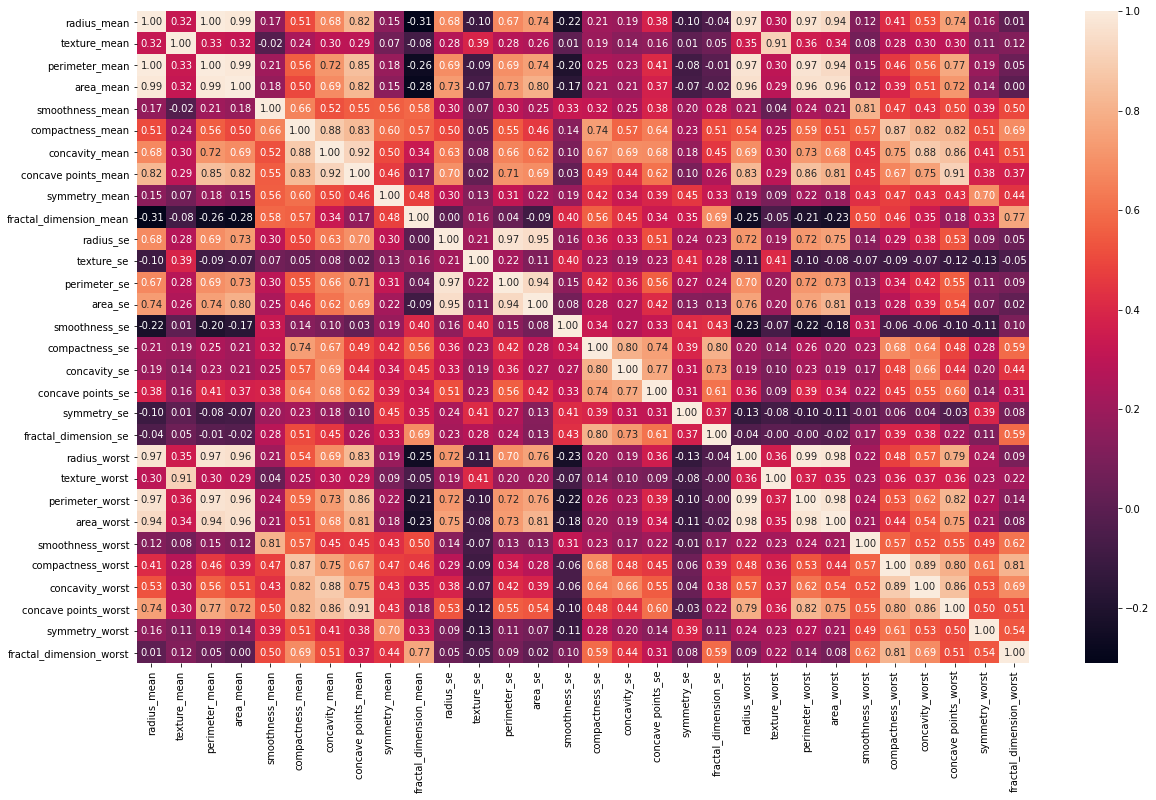

In [50]:
# Рисуем тепловую карту для корреляций
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt='.2f')

<AxesSubplot:>

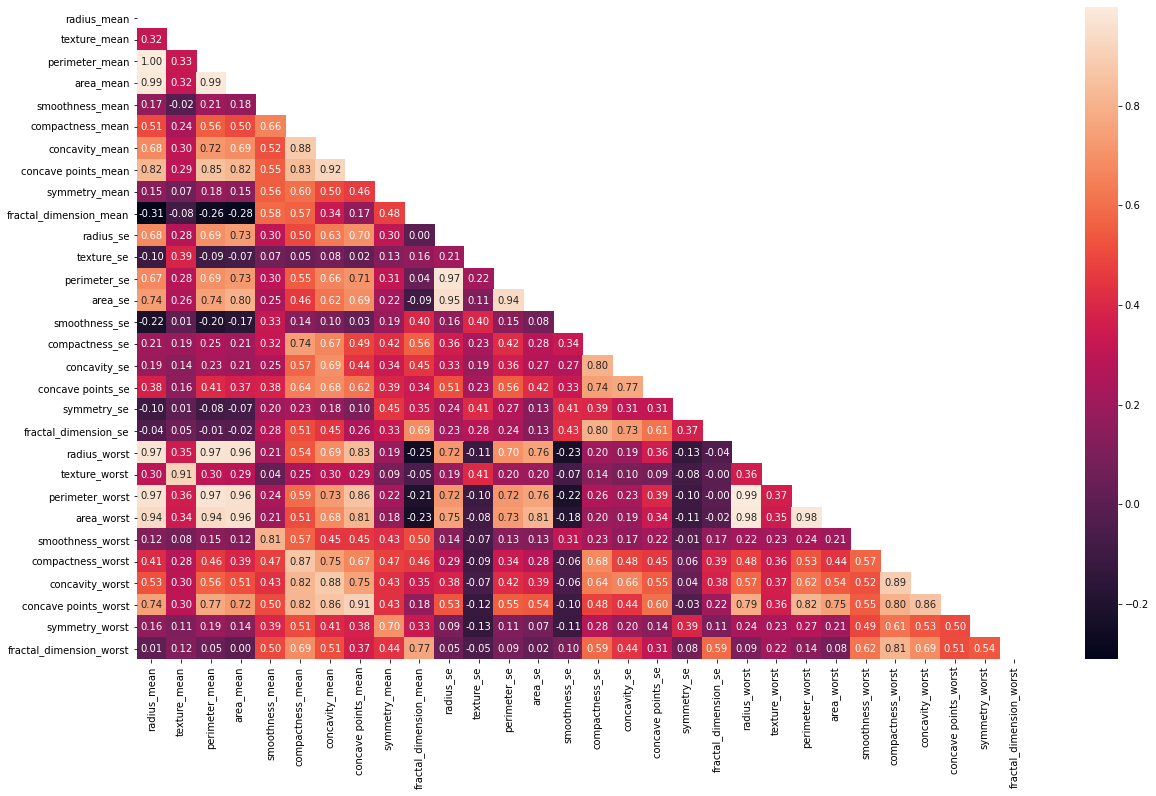

In [51]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)

In [52]:
cor_field = []
for i in corr:
    for j in corr.index[corr[i] > 0.6]:
        if i != j and j not in cor_field and i not in cor_field:
            cor_field.append(j)

In [63]:
n_samples = len(df)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
def quality(preds, trues):
    accuracy = accuracy_score(preds, trues)
    precision = precision_score(preds, trues)
    recall = recall_score(preds, trues)
    f1 = f1_score(preds, trues)
    
    print("Accuracy: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}"
          .format(accuracy, precision, recall, f1))

In [129]:
X_train.apply(lambda x: (x - x.mean())/x.std())

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
338    -1.149100     -0.390212       -1.127309  -0.957709         0.310642   
427    -0.936958      0.679766       -0.947159  -0.820622        -0.608966   
406     0.573490     -1.032199        0.513376   0.408137        -0.106044   
96     -0.546618     -0.315675       -0.576987  -0.565992         0.586017   
490    -0.526818      0.790370       -0.560946  -0.522995        -1.050290   
..           ...           ...             ...        ...              ...   
277     1.328714      0.198877        1.196138   1.251321        -0.520556   
9      -0.467418      1.175082       -0.322802  -0.496750         1.607803   
359    -1.322773     -0.200261       -1.316097  -1.047612         0.325135   
192    -1.242442     -0.224306       -1.278669  -1.021088        -1.950332   
559    -0.736131      1.148633       -0.711483  -0.698891        -0.275617   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
338         -0.595339       -0.801714            -0.801608       0.294215   
427         -0.908867       -0.659943            -0.897728       0.754104   
406         -0.362620       -0.417531            -0.088348      -0.271522   
96          -0.648617       -0.804413            -0.499515       0.330714   
490         -1.016413       -0.904154            -0.934777      -0.968655   
..                ...             ...                  ...            ...   
277         -0.880940       -0.093630             0.252347      -0.946756   
9            2.699176        1.797079             0.951875       0.805203   
359         -0.866680       -0.776136            -0.897210      -1.107352   
192         -1.582070       -1.124458            -1.261482      -0.570815   
559         -0.024137        0.304820            -0.197941      -1.538042   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
338                0.094148  ...     -1.042029       0.213298   
427               -0.425003  ...     -0.714867       1.065669   
406               -0.574589  ...      0.297288      -0.976743   
96                 0.539972  ...     -0.700554      -0.757093   
490               -0.426470  ...     -0.426556       1.057473   
..                      ...  ...           ...            ...   
277               -1.863667  ...      0.757359      -0.203052   
9                  2.898149  ...     -0.238439       2.481916   
359                1.015127  ...     -0.866179      -0.085032   
192                0.264265  ...     -1.285764      -0.771846   
559                0.444648  ...     -0.772121       1.904926   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
338        -1.034905   -0.847874          0.342122          -0.729295   
427        -0.689163   -0.667962         -0.095432          -0.537275   
406         0.261848    0.113763         -0.524147          -0.520294   
96         -0.734928   -0.658241         -0.815850          -1.033783   
490        -0.421959   -0.440470         -0.303160          -0.466737   
..               ...         ...               ...                ...   
277         0.648631    0.605069         -0.360617          -0.887352   
9          -0.276989   -0.289548          2.335425           5.265113   
359        -0.922414   -0.753058          0.037160          -0.959849   
192        -1.322187   -0.984642         -2.708825          -1.466741   
559        -0.730794   -0.694053         -0.117531          -0.001057   

     concavity_worst  concave points_worst  symmetry_worst  \
338        -0.811427             -0.757150       -0.016130   
427        -0.374636             -0.606203        0.096584   
406        -0.182788             -0.023693       -0.200282   
96         -1.090433             -0.851607       -1.075002   
490        -0.723768             -0.782257        0.310898   
..               ...                   ...             ...   
277        -0.232879              0.228906       -0

In [109]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [110]:
quality(pred, y_test)

Accuracy: 0.939 Precision: 0.936 Recall: 0.917 F1: 0.926


In [149]:
scaler = lambda x: (x - x.mean())/x.std()

# Классификатор по всем фичам без нормализации

In [120]:
grid_cv_params = {'n_neighbors': range(1, 51),
                  'p': range(1, 6)}
grid_search = GridSearchCV(KNeighborsClassifier(), grid_cv_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('best_score: {:.3f}, best k: {}, best p: {}'
      .format(grid_search.best_score_, grid_search.best_estimator_.n_neighbors, grid_search.best_estimator_.p))

test_preds = grid_search.best_estimator_.predict(X_test)
print('result: {:.3f}'.format(f1_score(test_preds, y_test)))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.4s


best_score: 0.914, best k: 11, best p: 1
result: 0.957


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    3.5s finished


# Классификатор по всем фичам с нормализацией

In [138]:
X_train_scaled = X_train.apply(scaler)
X_test_scaled = X_test.apply(scaler)

grid_cv_params = {'n_neighbors': range(1, 51),
                  'p': range(1, 6)}
grid_search = GridSearchCV(KNeighborsClassifier(), grid_cv_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print('best_score: {:.3f}, best k: {}, best p: {}'
      .format(grid_search.best_score_, grid_search.best_estimator_.n_neighbors, grid_search.best_estimator_.p))

test_preds = grid_search.best_estimator_.predict(X_test_scaled)
print('result: {:.3f}'.format(f1_score(test_preds, y_test)))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.6s


best_score: 0.957, best k: 3, best p: 1
result: 0.945


[Parallel(n_jobs=-1)]: Done 1239 out of 1250 | elapsed:    5.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    5.8s finished


# Классификатор по фичам с корреляцией < 0.6 без нормализации

In [147]:
X_train_unconn = X_train.drop(columns=cor_field)
X_test_uncorr = X_test.drop(columns=cor_field)

grid_cv_params = {'n_neighbors': range(1, 51),
                  'p': range(1, 6)}
grid_search = GridSearchCV(KNeighborsClassifier(), grid_cv_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_unconn, y_train)

print('best_score: {:.3f}, best k: {}, best p: {}'
      .format(grid_search.best_score_, grid_search.best_estimator_.n_neighbors, grid_search.best_estimator_.p))

test_preds = grid_search.best_estimator_.predict(X_test_uncorr)
print('result: {:.3f}'.format(f1_score(test_preds, y_test)))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s


best_score: 0.873, best k: 33, best p: 2
result: 0.882


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    3.2s finished


# Классификатор по фичам с корреляцией < 0.6 с нормализацией

In [148]:
X_train_unconn_scaled = X_train.drop(columns=cor_field).apply(scaler)
X_test_uncorr_scaled = X_test.drop(columns=cor_field).apply(scaler)

grid_cv_params = {'n_neighbors': range(1, 51),
                  'p': range(1, 6)}
grid_search = GridSearchCV(KNeighborsClassifier(), grid_cv_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_unconn_scaled, y_train)

print('best_score: {:.3f}, best k: {}, best p: {}'
      .format(grid_search.best_score_, grid_search.best_estimator_.n_neighbors, grid_search.best_estimator_.p))

test_preds = grid_search.best_estimator_.predict(X_test_uncorr_scaled)
print('result: {:.3f}'.format(f1_score(test_preds, y_test)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.6s


best_score: 0.914, best k: 3, best p: 4
result: 0.804


[Parallel(n_jobs=-1)]: Done 1239 out of 1250 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    3.9s finished
